# Trabalho ENGA75

### Autor: Allan Souza Almeida

#### Importando objeto UR5 e suas funções

In [1]:
import ur5
import math
import numpy as np
import matplotlib.pyplot as plt
PI = math.pi
ur5 = ur5.UR5()

2023-06-02 15:38:52.741018: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 15:38:52.763743: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 15:38:52.857475: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 15:38:52.858123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 15:38:53.462955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Inicializando parâmetros do robô...
Obtendo handles das juntas...
Iniciando simulação...
Pronto!


## Etapa A1

Implementar a Cinemática Direta e Inversa do Robô UR5. Validar a modelagem com o auxílio do
simulador para um conjunto de valores das variáveis das juntas (Cinemática Direta) e para um conjunto de
posições e orientações da garra (Cinemática Inversa)

#### Cinemática Direta

<img src="Cinemática Direta (DH).png" width="500">

In [ ]:
def validate_fk(ang):
    fk, _ = ur5.forward_kinematics(ang)    # Calcular cinemática direta a partir dos ângulos
    print('Cinemática Direta: ')
    print(fk)
    ur5.move_to_config(ang)     # Mover para a posição
    print('Ground Truth: ')
    gt = ur5.get_ground_truth()     # Obter Ground Truth
    print(gt)
    print('Erro: ', np.linalg.norm(fk-gt)/np.linalg.norm(gt)*100, '%')  # Calcular e printar erro

In [ ]:
validate_fk([.5*PI, .05*PI, .45*PI, 0, -.5*PI, .5*PI])

In [ ]:
validate_fk([-.5*PI, -.05*PI, -.45*PI, 0, .5*PI, .5*PI])

In [ ]:
validate_fk([PI/2, 0, 0, 0, 0, 0])

In [ ]:
validate_fk([.1*PI, .18*PI, .57*PI, 0.25*PI, 0.2, PI/2])

In [ ]:
validate_fk([-.3*PI, -.04*PI, -.8*PI, -0.17*PI, -0.5, PI/2])

In [ ]:
validate_fk([0.2, .04*PI, .8*PI, 0.17*PI, 0.3, PI/2])

#### Cinemática Inversa

<img src="gripper.png" width="700">

In [ ]:
ur5.move_to_pose([-0.1, -.55, .4], [PI, 0, PI/2], wrist='up')

In [ ]:
ur5.move_to_pose([-0.1, -.55, .4], [0, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.55, .4], [PI/2, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.45, .4], [PI/2, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.45, .25], [PI/2, 0, -PI/2], wrist='down')

In [ ]:
ur5.move_to_pose([-0.1, -.45, .25], [0, -PI/2, PI], wrist='up')

## Etapa A2

Implementar um sistema de planejamento de trajetórias no espaço de juntas com uma das abordagens
abaixo:

1. Trajetórias polinomiais cúbicas ou de quinto grau;
2. Linear Segments with Parabolic Blends (LSPB);
3. Minimum Time Trajectories

<b>Polinômio de Quinto Grau</b>

<p>$q(t) = a_0+a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_5 t^5$</p>

<p>$\dot{q}(t) = a_1 + 2 a_2 t + 3 a_3 t^2 + 4 a_4 t^3 + 5 a_5 t^4$</p>

<p>$\ddot{q}(t) = 2 a_2 + 6 a_3 t + 12 a_4 t^2 + 20 a_5 t^3$</p>

$\begin{bmatrix}
1 & t_0 & t_0^2 & t_0^3 & t_0^4 & t_0^5\\
0 & 1 & 2t_0 & 3t_0^2 & 4t_0^3 & 5t_0^4\\
0 & 0 & 2 & 6t_0 & 12t_0^2 & 20t_0^3\\
1 & t_f & t_f^2 & t_f^3 & t_f^4 & t_f^5\\
0 & 1 & 2t_f & 3t_f^2 & 4t_f^3 & 5t_f^4\\
0 & 0 & 2 & 6t_f & 12t_f^2 & 20t_f^3\\
\end{bmatrix}

\cdot

\begin{bmatrix}
a_0\\
a_1\\
a_2\\
a_3\\
a_4\\
a_5\\
\end{bmatrix}

=

\begin{bmatrix}
q_0\\
\dot{q}_0\\
\ddot{q}_0\\
q_f\\
\dot{q}_f\\
\ddot{q}_f\\
\end{bmatrix}$

<p>$A\cdot X = B$</p>

In [ ]:
t, max_err, mean_err, graphs, _ = ur5.move_to_config([.5*PI, .05*PI, .45*PI, 0, .5*PI, .3*PI], graph=True)

In [ ]:
titles = ['Posição', 'Velocidade', 'Aceleração', 'Solavanco']
axes = ['rad', 'rad/s', 'rad/$s^2$', 'rad/$s^3$']

for i in range(4):
    for j in range(6):
        plt.plot(graphs[4][j], graphs[i][j])
    plt.legend(['q1', 'q2', 'q3', 'q4', 'q5', 'q6'])
    plt.grid()
    plt.title(titles[i], fontsize=18)
    plt.ylabel(axes[i], rotation=0, labelpad=20)
    plt.xlabel('t [s]')
    plt.show()

## Jacobiano

In [ ]:
_, _, _, _, _ = ur5.move_to_config([0, 0, 0, 0, 0, 0])

In [ ]:
_, _, _, graphs, jacob = ur5.move_to_config([0, 0, -PI/2, 0, 0, 0], graph=True, jacob=True, duration=None)

In [ ]:
for j in range(6):
    plt.plot(graphs[4][j], graphs[1][j])
plt.legend(['q1', 'q2', 'q3', 'q4', 'q5', 'q6'])
plt.grid()
plt.title('Velocidade', fontsize=18)
plt.ylabel('rad/s', rotation=0, labelpad=20)
plt.xlabel('t [s]')
plt.show()

In [ ]:
for j in range(3):
    plt.plot(graphs[4][j], [i[j] for i in jacob])
plt.title('Jacobiano (vel. lin.)', fontsize=18)
plt.legend(['$v_x$', '$v_y$', '$v_z$'])
plt.xlabel('t [s]')
plt.ylabel('m/s', rotation=0, labelpad=20)
plt.show()

for j in range(3, 6):
    plt.plot(graphs[4][j], [i[j] for i in jacob])
plt.title('Jacobiano (vel,. ang.)', fontsize=18)
plt.legend(['$\omega_x$', '$\omega_y$', '$\omega_z$'])
plt.xlabel('t [s]')
plt.ylabel('rad/s', rotation=0, labelpad=20)
plt.show()

## Visão Computacional e Pick and Place

In [6]:
from ur5 import ComputerVision
import time
cv = ComputerVision()
cv.load_model()

2023-06-02 15:42:57.624802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 15:42:57.711944: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


#### Pose de Leitura de Imagem

In [7]:
ur5.move_to_pose([-0.1, -.55, .4], [PI, 0, PI/2], wrist='up')

Iterações totais:  20
Erro pose final:  0.10824872597258017 %


#### VGG16 - Transfer Learning - Visão Computacional

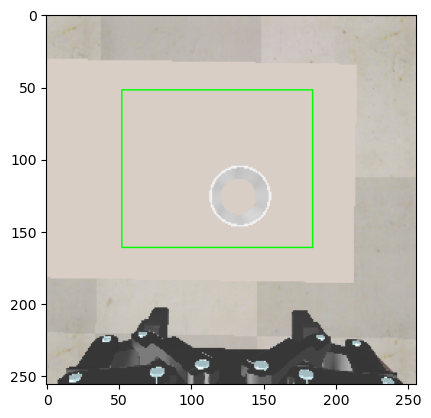

1/1 [==============================] - 0s 112ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Posição real do copo:  [-0.112642   -0.64323832  0.05786382]
Posição predita do copo:  [-0.10863636 -0.64761468  0.05797996]


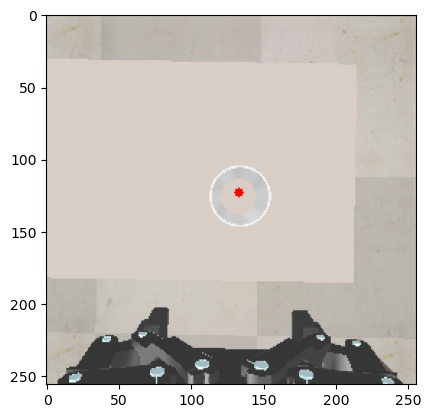

In [58]:
cup_position = cv.move_cup()
predicted_cup_position = cv.predict()
print('Posição real do copo: ', cup_position)
print('Posição predita do copo: ', predicted_cup_position)

#### Pre-Graspping

In [59]:
ur5.move_to_pose(predicted_cup_position+np.array([0, 0.2, 0.015]), [PI/2, 0, -PI/2])

Iterações totais:  39
Erro pose final:  0.1145970328950259 %


#### Graspping

In [60]:
ur5.move_to_pose(predicted_cup_position + np.array([0, 0.017, 0.017]), [PI / 2, 0, -PI / 2], duration=6)

Iterações totais:  30
Erro pose final:  0.0773006144188895 %


In [61]:
ur5.close_gripper()

#### Pre-Placing

In [62]:
ur5.move_to_pose(np.array([0.4, 0, predicted_cup_position[2]+0.1]), [PI/2, 0, -PI/2], wrist='up', duration=10)

Iterações totais:  50
Erro pose final:  0.08714378051310506 %


#### Placing

In [63]:
ur5.move_to_pose(np.array([0.4, 0, predicted_cup_position[2]+0.008]), [PI/2, 0, -PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.15563372243361231 %


In [64]:
ur5.open_gripper()
time.sleep(1)

#### Afastando do copo

In [65]:
ur5.move_to_pose(np.array([0.4, .1, predicted_cup_position[2]+0.01]), [PI/2, 0, -PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.0679928323754584 %


In [66]:
ur5.move_to_pose(np.array([0.4, .1, predicted_cup_position[2]+0.2]), [PI/2, 0, -PI/2], wrist='up')

Iterações totais:  7
Erro pose final:  0.2526394746797839 %


#### Voltando para a posição inicial

In [67]:
ur5.move_to_pose([-0.1, -.55, .4], [PI, 0, PI/2], wrist='up')

Iterações totais:  30
Erro pose final:  0.08096162468580316 %
